In this analysis, I am hired as a consultant for a makeup brush line. I created this fake data to take a look at three of the most popular makeup brush lines to analyze characteristics & predict prices. 

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# import file and view head of data
df = pd.read_csv ('C:/Users/Cianika/Desktop/Data Science Degree/Projects/MakeupBrushes.csv')
df.head()

,MakeupBrush,Price,Hair,Handle
0,Sephora,97,Human,Black
1,Ulta,54,Synthetic,Chrome
2,Mac,23,Goat,Wood
3,Ulta,52,Synthetic,Chrome
4,Sephora,97,Human,Black


In [6]:
# view dataset for missing values
df.isnull().sum()

MakeupBrush    0
Price          0
Hair           0
Handle         0
dtype: int64

# Which makeupbrush appears more frequent in the dataset?

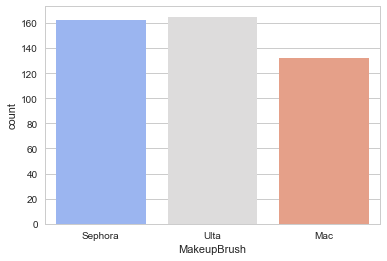

In [7]:
# view number of brushes in dataset
sns.set_style('whitegrid')
sns.countplot(x='MakeupBrush', data=df, palette='coolwarm')

In [8]:
df.groupby('MakeupBrush').size()

MakeupBrush
Mac        132
Sephora    162
Ulta       165
dtype: int64

Per the visualization & table above, Ulta makeup brushes are most purchased.

# What brush is the most expensive?

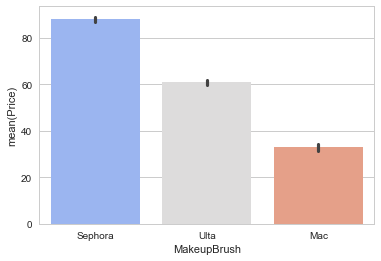

In [9]:
# visualize the most makeupbrushes by price
sns.set_style('whitegrid')
sns.barplot(x='MakeupBrush', y='Price', data=df, palette='coolwarm')

In [10]:
# total paid by brush brand
df.groupby('MakeupBrush').Price.sum()

MakeupBrush
Mac         4359
Sephora    14260
Ulta       10061
Name: Price, dtype: int64

Consumers paid more money on the Sephora brand brushes.

# What brush handle is most favorable?

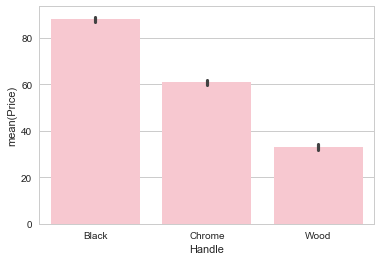

In [11]:
# visualize the most brush handle by average price
sns.set_style('whitegrid')
sns.barplot(x='Handle', y='Price', data=df, color='Pink')

Per the visualization above, most consumers favor the black makeup brush handle.

# How much are consumers paying for makeup brushes?

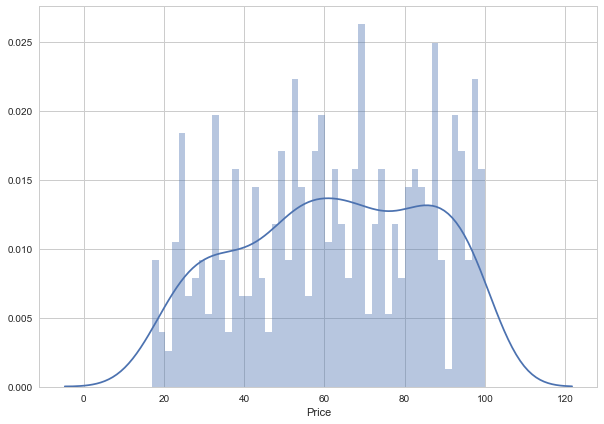

In [31]:
# visualize histogram of prices
plt.figure(figsize=(10,7))
sns.distplot(df.Price, bins=50)

This visualization concludes that cheapest price paid by consumers was around 15 dollars for a makeupbrush and the most paid was 100 dollars. Most consumers paid a little under 70 dollars for a makeup brush. 

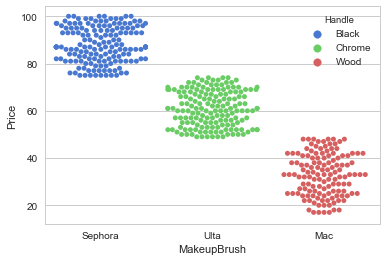

In [18]:
sns.swarmplot(x='MakeupBrush', y='Price', hue='Handle', data=df, palette='muted')

This visualization shows that each makeup brand prices are in tiers. For the higher end (Sephora brand), consumers pay no less than around 75 dollars. This may coincide with the fact that those brushes have black handles. This is the opposite for Mac brushes where consumers can pay around 15 dollars for wood brushes. 

# Predict Prices

In [37]:
# view info on dataset for categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 4 columns):
MakeupBrush    459 non-null object
Price          459 non-null int64
Hair           459 non-null object
Handle         459 non-null object
dtypes: int64(1), object(3)
memory usage: 14.4+ KB


In [36]:
# checking for null values
df.isnull().any()

MakeupBrush    False
Price          False
Hair           False
Handle         False
dtype: bool

In [38]:
# transform categorial brush data
def convert_brush(x):
    if x == 'Sephora':
        return 1
    if x == 'Ulta':
        return 2
    if x == 'Mac':
        return 3
df['brush_num'] = df['MakeupBrush'].apply(convert_brush)

In [39]:
# transform categorial handle data
def convert_handle(x):
    if x == 'Wood':
        return 1
    if x == 'Black':
        return 2
    if x == 'Chrome':
        return 3
df['handle_num'] = df['Handle'].apply(convert_handle)

In [40]:
# transform categorial hair data
def convert_hair(x):
    if x == 'Goat':
        return 1
    if x == 'Human':
        return 2
    if x == 'Synthetic':
        return 3
df['hair_num'] = df['Hair'].apply(convert_hair)

In [41]:
# view head of data to ensure functions worked properly
df.head()

,MakeupBrush,Price,Hair,Handle,brush_num,handle_num,hair_num
0,Sephora,97,Human,Black,1,2,2
1,Ulta,54,Synthetic,Chrome,2,3,3
2,Mac,23,Goat,Wood,3,1,1
3,Ulta,52,Synthetic,Chrome,2,3,3
4,Sephora,97,Human,Black,1,2,2


In [49]:
# view info on data for feature columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 7 columns):
MakeupBrush    459 non-null object
Price          459 non-null int64
Hair           459 non-null object
Handle         459 non-null object
brush_num      459 non-null int64
handle_num     459 non-null int64
hair_num       459 non-null int64
dtypes: int64(4), object(3)
memory usage: 25.2+ KB


In [55]:
# create features
features = df.select_dtypes([np.number])
features.drop(['Price'], axis=1, inplace=True)

C:\Users\Cianika\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [56]:
# create features
X = features

In [57]:
# create values
y = df['Price']

In [59]:
# import package to split data
from sklearn.model_selection import train_test_split

In [60]:
# create split on data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
# import package for linear regression 
from sklearn.linear_model import LinearRegression

In [62]:
# creat object and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# print intercept & coef
print lm.intercept_
print lm.coef_

113.327694405
[-27.33354845   0.52669287   0.52669287]


In [69]:
# create coef dataframe to better view feature data
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['coef'])
cdf

,coef
brush_num,-27.333548
handle_num,0.526693
hair_num,0.526693


In [70]:
# view predictions
predictions = lm.predict(X_test)
predictions

array([ 88.10091743,  32.38043478,  61.82075472,  88.10091743,
        32.38043478,  61.82075472,  61.82075472,  61.82075472,
        88.10091743,  88.10091743,  88.10091743,  88.10091743,
        61.82075472,  32.38043478,  88.10091743,  61.82075472,
        88.10091743,  88.10091743,  32.38043478,  88.10091743,
        61.82075472,  61.82075472,  61.82075472,  88.10091743,
        88.10091743,  32.38043478,  32.38043478,  61.82075472,
        61.82075472,  61.82075472,  32.38043478,  32.38043478,
        88.10091743,  88.10091743,  88.10091743,  61.82075472,
        61.82075472,  32.38043478,  61.82075472,  88.10091743,
        32.38043478,  61.82075472,  88.10091743,  32.38043478,
        32.38043478,  32.38043478,  61.82075472,  88.10091743,
        32.38043478,  88.10091743,  32.38043478,  61.82075472,
        61.82075472,  61.82075472,  32.38043478,  88.10091743,
        61.82075472,  61.82075472,  61.82075472,  32.38043478,
        61.82075472,  61.82075472,  32.38043478,  88.10

# Model Evaluation

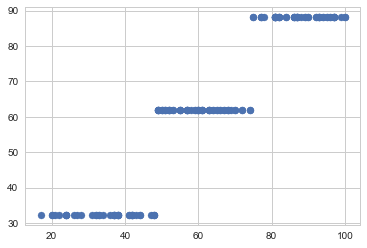

In [72]:
# plot predictions and actual values
plt.scatter(y_test, predictions)

In [89]:
# evalute model
from sklearn import metrics

In [91]:
# calculate MAE
metrics.mean_absolute_error(y_test, predictions)

6.66454973739864

In [93]:
# calculate MSE
metrics.mean_squared_error(y_test, predictions)

60.755111186574382

In [96]:
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictions))

7.7945565099352754

In [97]:
# explained variance 
metrics.explained_variance_score(y_test, predictions)

0.87680778267733117

In [103]:
# print score
lm.score(X, y)

0.8869019602056164

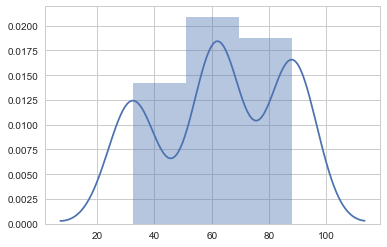

In [123]:
# plot predictions frequency
sns.distplot(predictions)

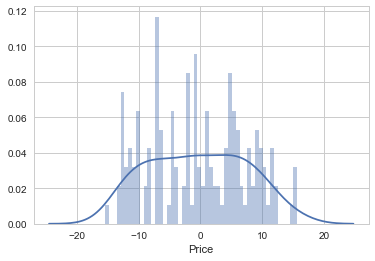

In [129]:
sns.distplot((y_test - predictions), bins=50)

In [133]:
# predict a price of each makeup brushes by brand
lm.predict([[1,2,2], [2,3,3], [3,1,1]])

array([ 88.10091743,  61.82075472,  32.38043478])